In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
columnsNames=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
dataTypes = {'workclass':'category','education':'category','marital-status':'category','occupation':'category','relationship':'category','race':'category','sex':'category','native-country':'category'}
dfAdult = pd.read_csv('adult.data',names=columnsNames,dtype=dataTypes)
dfAdult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education-num     32561 non-null int64
marital-status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null category
income            32561 non-null object
dtypes: category(8), int64(6), object(1)
memory usage: 2.0+ MB


In [3]:
#looks like there are some unusual outliers in capital-gain and hours-per-week. The numbers with 9 in all places are 
# rather suspicous.
dfAdult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
dfAdult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Looking for nulls

### Exploratory Analysis
- Looking for unusual values

In [5]:
dfAdult.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [6]:
#Looks like the education-num gives the an increasing numeric value for increasing education level.
# We could use education-num instead of education.
print(dfAdult.loc[:,['education','education-num']].drop_duplicates().sort_values('education-num'))
columnsToDrop = ['education']

         education  education-num
224      Preschool              1
160        1st-4th              2
56         5th-6th              3
15         7th-8th              4
6              9th              5
77            10th              6
3             11th              7
415           12th              8
2          HS-grad              9
10    Some-college             10
14       Assoc-voc             11
13      Assoc-acdm             12
0        Bachelors             13
5          Masters             14
52     Prof-school             15
20       Doctorate             16


Looking at the distribution of values in each column.

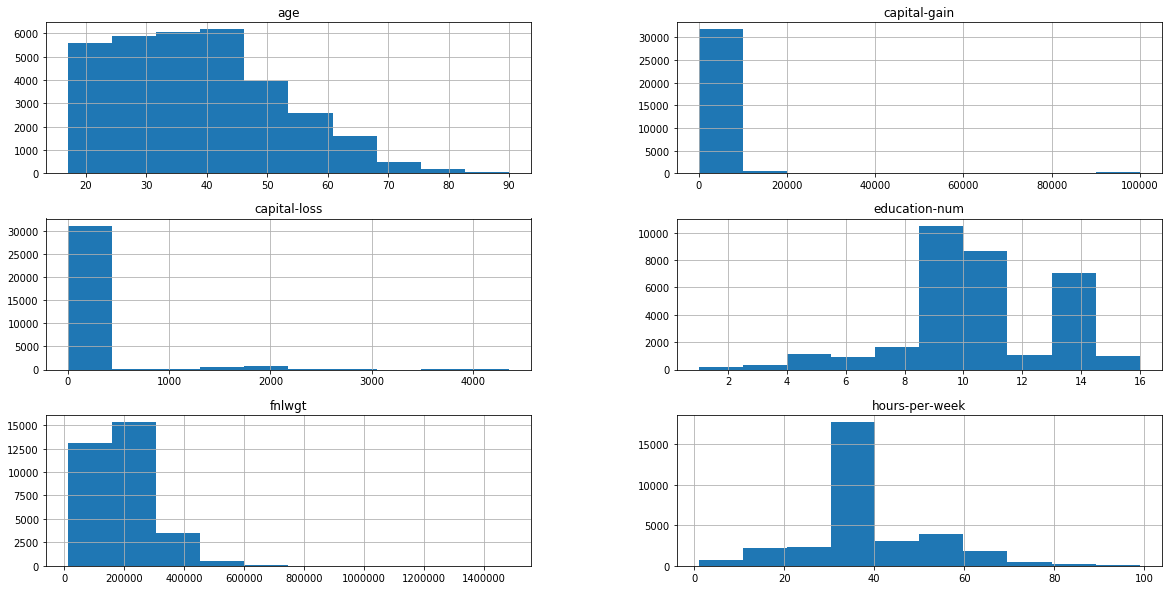

In [7]:
x = dfAdult.hist(figsize=(20,10))
plt.show()

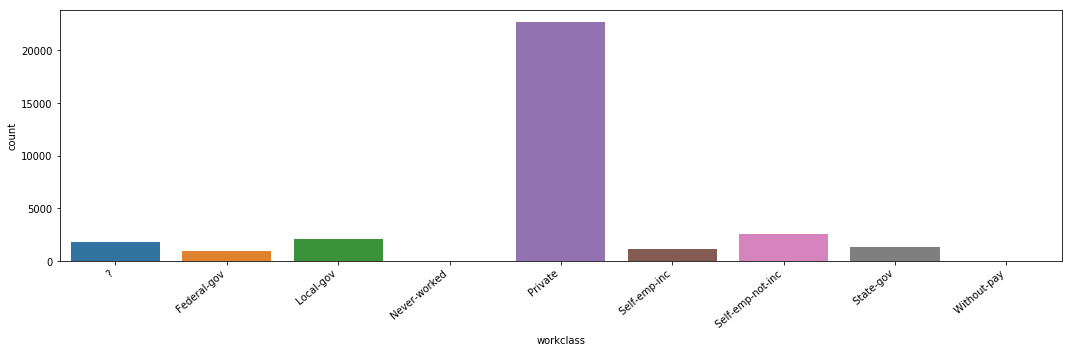

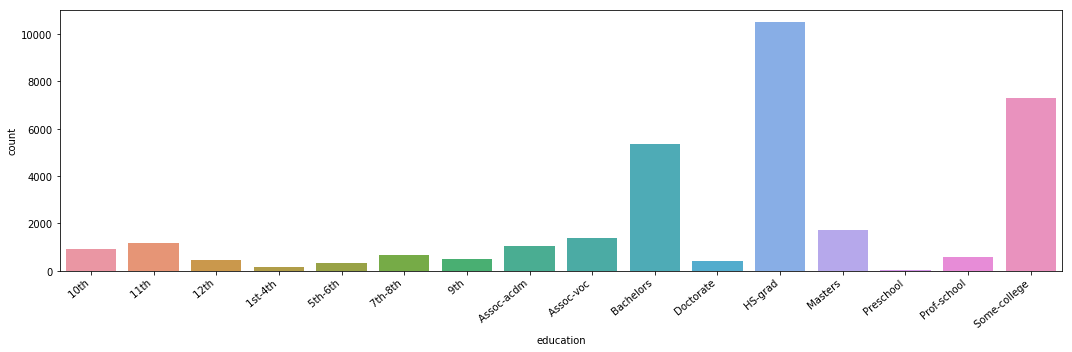

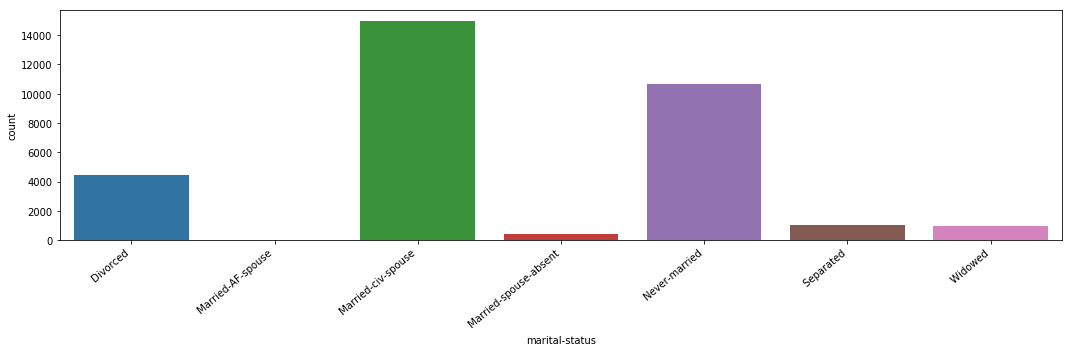

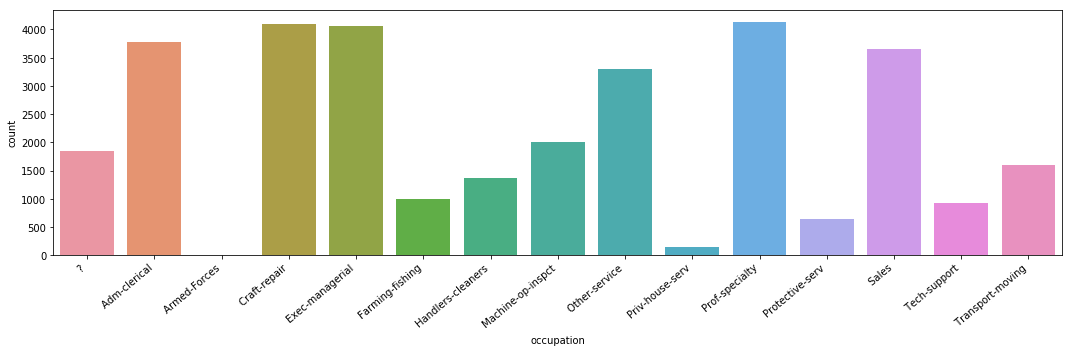

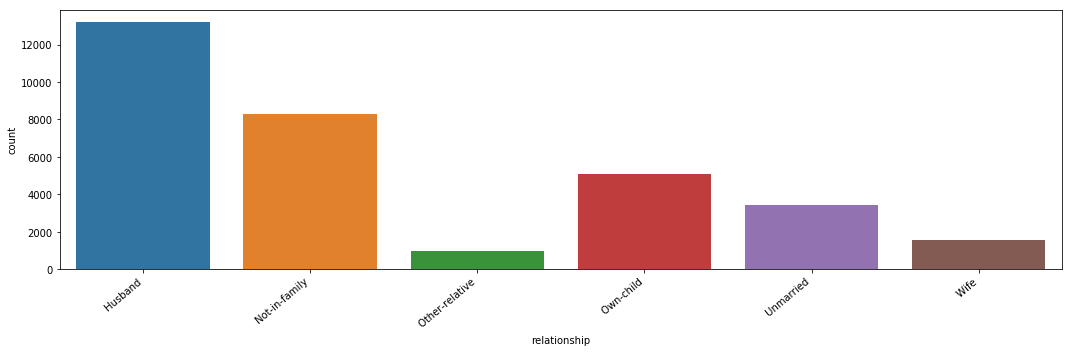

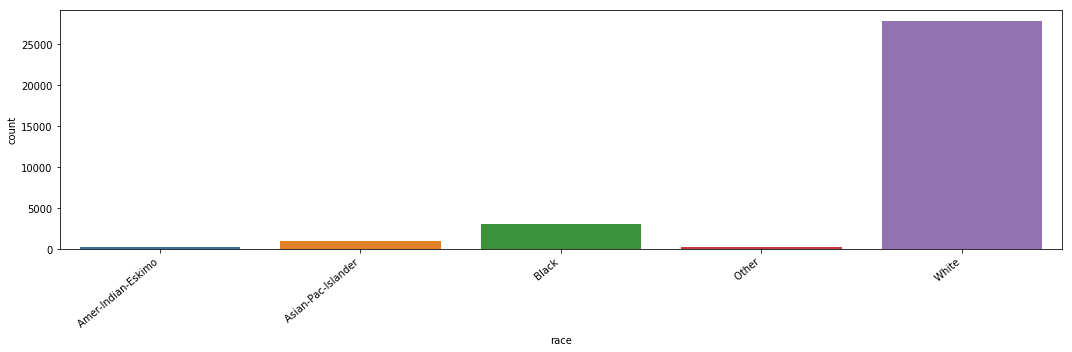

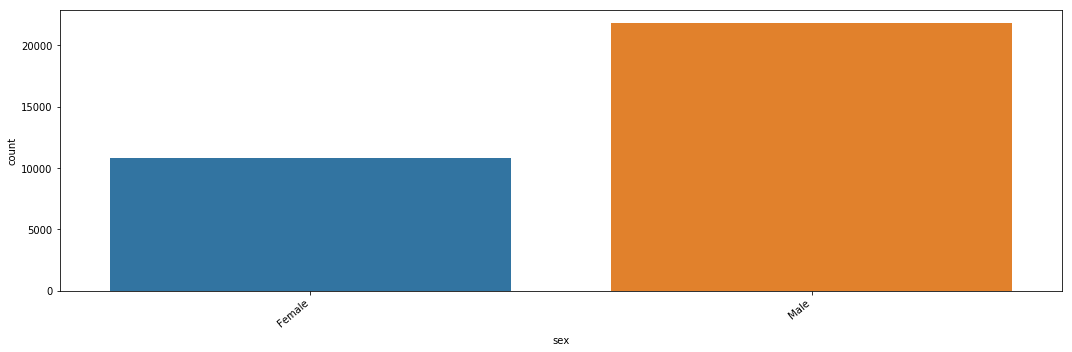

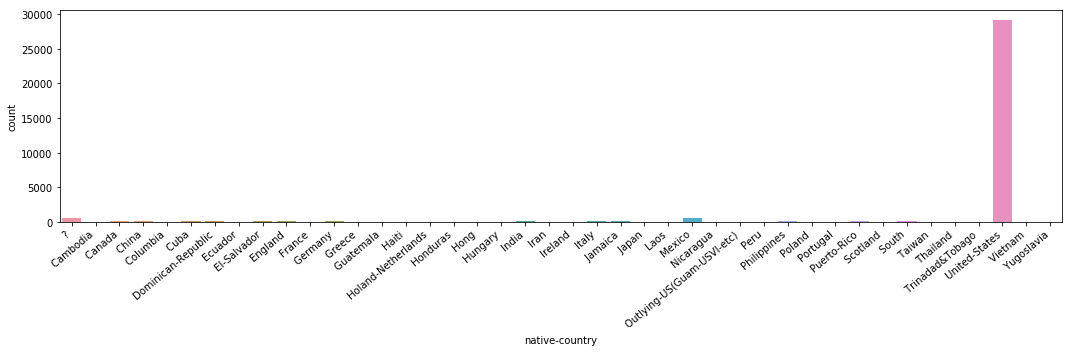

In [8]:
catColumns=['workclass', 'education',  'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for col in catColumns:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=col, data=dfAdult)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

- Looks like most of the people between 16 to 50.
- Very small number of people had capital gain or loss.
- Most of the people are working full-time (at least 40 hrs/week) working as private individuals.
- There are no surprises in education levels, as common knowledge most of them are High School grads.
- Most common type of occupations seem to be either office type work or special skills.
- Rest of distribution no surprises either, where most of them have less 50k.

It would be interesting to know the their location, that is the state or if they are in urban or rural area.

#### Income distribution with groups

C:\Users\patel\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\patel\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


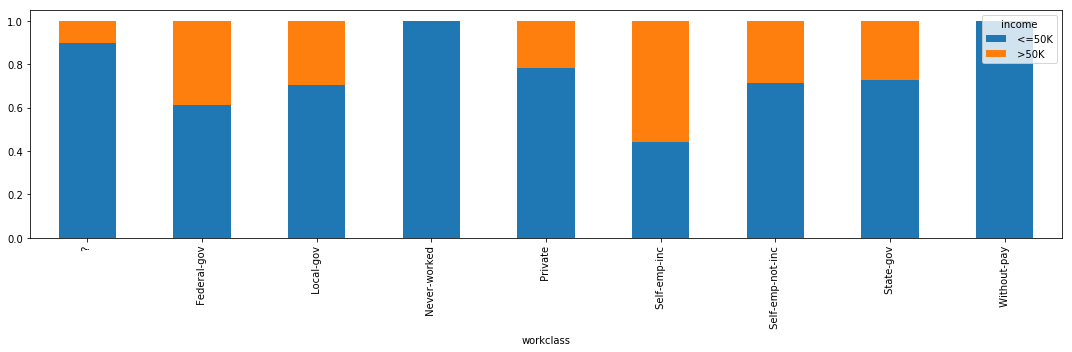

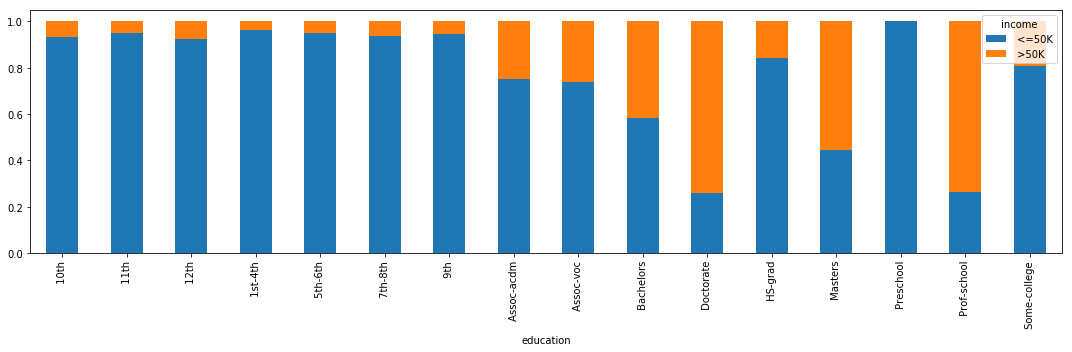

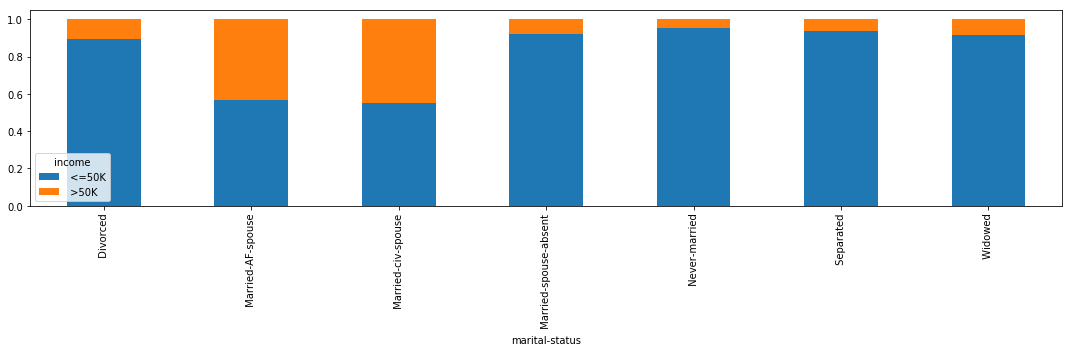

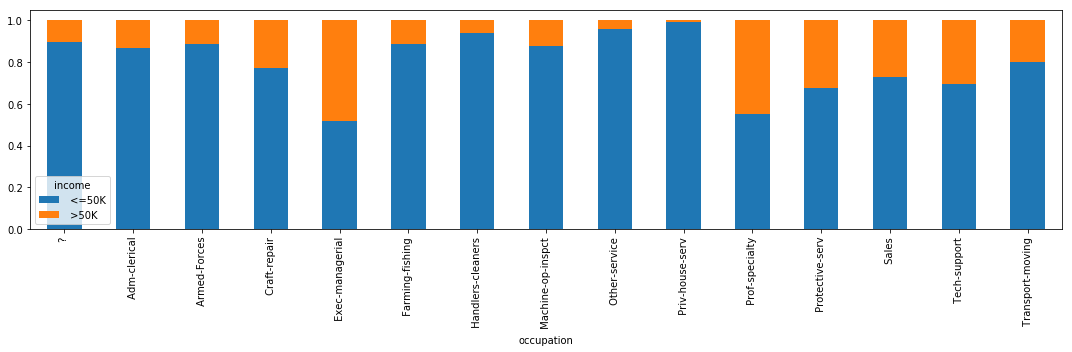

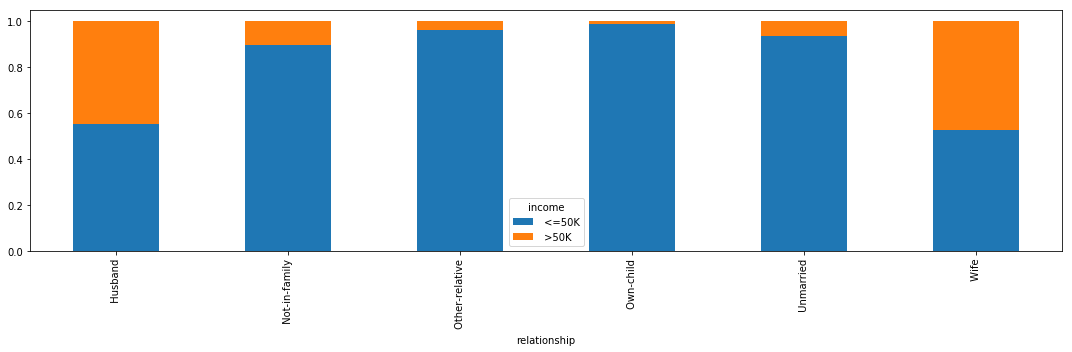

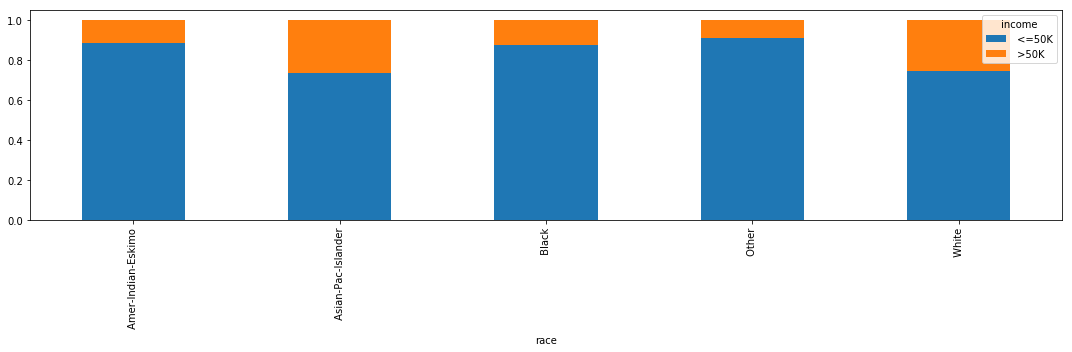

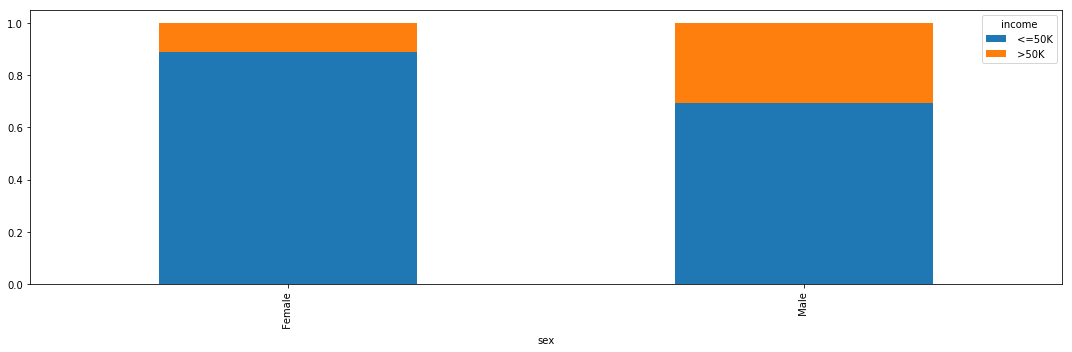

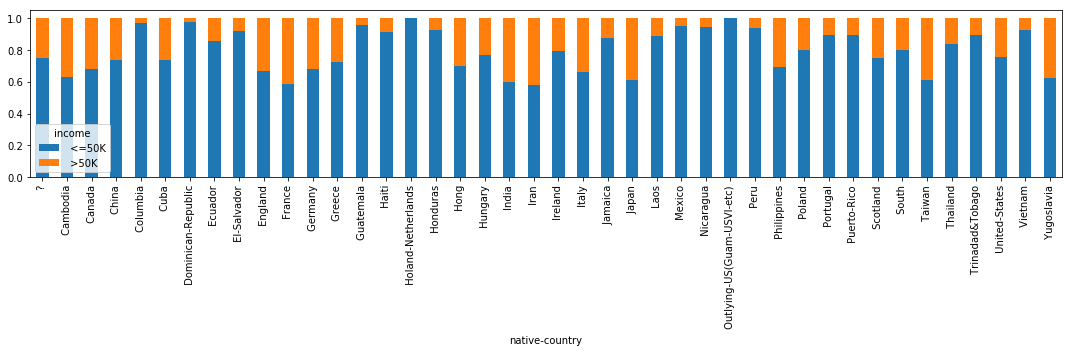

In [9]:
for col in catColumns:
    temp_df = dfAdult[['income',col]]
    temp_df.loc[:,'count']=1
    temp_df.loc[:,'percent'] = temp_df.groupby(['income',col])['count'].transform('sum')/temp_df.groupby([col])['count'].transform('sum')
    temp_df.pivot_table(columns='income',index=col, values='percent').plot(kind='bar', stacked=True, figsize=(15,5))
    plt.tight_layout()
    plt.show()

- When you look at worker class is Self employed or any kind of government jobs earn more.
- Higher the education earns you more.
- People who are married to someone are more likely to have high incomes.
- Occupation requiring niche/speciality skills or higher up the management chain, earns you high salaries.
- Asian and Whites have more high income earning people. Although not my a huge margin.
- High income earners tend to be male.
- People with certain native country make up larger chuck of the high income earners. For example, Asian and European countries like Cambodia, India, Iran, Japan, Taiwan, England, France, Yugoslavia.
- Whereas most of the poeple from countries like Domoninican-Republic, Columbia, Guatamala have income below 50k. 
- Surprisingly, US island of Guam and poeple from Holand/Netherlands have no high income earners. Less reprentation perhaps?

It would be interesting to see the breakdown of low and high income levels seperately into above groups. <br>
Another way would to see how income varies by age group.

### Transformation and Filtering

#### Who are people marked with '?'

In [32]:
#Can we derive workclass from occupation?
#Looks like for same records occupation is also missing.
dfAdult.loc[(dfAdult['workclass']==' ?'),:]['occupation'].drop_duplicates()

27     ?
Name: occupation, dtype: category
Categories (15, object): [?, Adm-clerical, Armed-Forces, Craft-repair, ..., Protective-serv, Sales, Tech-support, Transport-moving]

In [10]:
#We cannot really derive the missing values in workclass, occupation and native-country.
#Re-categorizing them to something more general, may not be a good idea with lack of information. 
# Hence dropping these values.
dfCleanAdult = dfAdult.replace(' ?',np.nan)
print('Shape before:',dfCleanAdult.shape)
dfCleanAdult = dfCleanAdult.dropna(how='any')
print('Shape after:',dfCleanAdult.shape)

Shape before: (32561, 15)
Shape after: (30162, 15)


In [11]:
# As number of representation from other countires is small compared to US, 
# we will combine rest of the world into one category.
print(dfCleanAdult.loc[:,'native-country'].value_counts())
dfCleanAdult.loc[:,'native-country'] = np.where(dfCleanAdult['native-country']==' United-States',1,0)
# columnsToDrop.append('native-country')
dfCleanAdult.head()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Haiti                            42
 Iran                             42
 Taiwan                           42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,1,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,1,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K


In [12]:
# Converting target value to numeric
dfCleanAdult.loc[:,'income']=dfCleanAdult.loc[:,'income'].map({' <=50K':0,' >50K':1})
# columnsToDrop.append('income')

dfCleanAdult.loc[:,'sex']=dfCleanAdult.loc[:,'sex'].map({' Male':1,' Female':0})
# columnsToDrop.append('sex')

dfCleanAdult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,0


In [13]:
#Capital gain and loss, we would mark any gain or loss with 1 and none with 0.
dfCleanAdult.loc[:,'capital-gain'] = np.where(dfCleanAdult.loc[:,'capital-gain']>0,1,0)
dfCleanAdult.loc[:,'capital-loss'] = np.where(dfCleanAdult.loc[:,'capital-loss']>0,1,0)

In [14]:
#looking at relationship, its clear that couple staying together more likely to have high income then otherwise.
#Grouping couples together represented by 1 and singles as 0.
print(dfCleanAdult.groupby('marital-status')['income'].mean())
dfCleanAdult.loc[:,'marital-status'] = dfCleanAdult.loc[:,'marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],1)
dfCleanAdult.loc[:,'marital-status'] = dfCleanAdult.loc[:,'marital-status'].replace([' Married-spouse-absent',' Divorced',' Never-married',' Separated',' Widowed'],0)
dfCleanAdult.head()

marital-status
 Divorced                 0.107262
 Married-AF-spouse        0.476190
 Married-civ-spouse       0.454959
 Married-spouse-absent    0.083784
 Never-married            0.048324
 Separated                0.070288
 Widowed                  0.096735
Name: income, dtype: float64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,1,1,0,40,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,0,0,40,0,0


In [15]:
#We could reduce the workclass into 4 categories govt, private, self-employed, without-pay.
print(dfCleanAdult.loc[:,'workclass'].drop_duplicates())
dfCleanAdult.loc[:,'workclass'] = np.where(dfCleanAdult['workclass'].isin([' State-gov',' Federal-gov',' Local-gov']),'govt',\
                                           np.where(dfCleanAdult['workclass'].isin([' Self-emp-not-inc',' Self-emp-inc']),'self-employed',\
                                                    np.where(dfCleanAdult['workclass']==' Private','private','without-pay')))

#dropping column education as same information is available in education-num.
dfCleanAdult = dfCleanAdult.drop(columns=columnsToDrop)
dfCleanAdult.head()

0               State-gov
1        Self-emp-not-inc
2                 Private
22            Federal-gov
25              Local-gov
54           Self-emp-inc
1901          Without-pay
Name: workclass, dtype: category
Categories (9, object): [?, Federal-gov, Local-gov, Never-worked, ..., Self-emp-inc, Self-emp-not-inc, State-gov, Without-pay]


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,govt,77516,13,0,Adm-clerical,Not-in-family,White,1,1,0,40,1,0
1,50,self-employed,83311,13,1,Exec-managerial,Husband,White,1,0,0,13,1,0
2,38,private,215646,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,0
3,53,private,234721,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,1,0
4,28,private,338409,13,1,Prof-specialty,Wife,Black,0,0,0,40,0,0


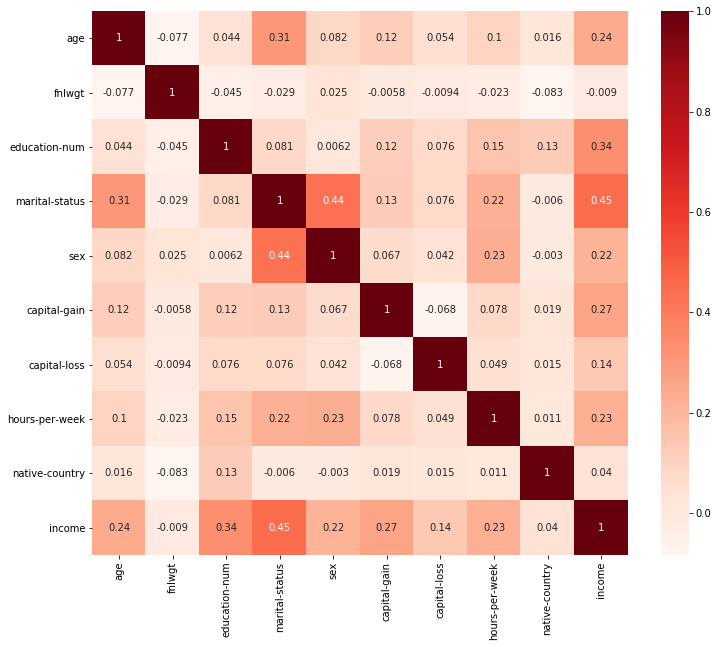

In [16]:
#Looking at correlation between income and other columns.
#It doesn't look like anyone column has really high coorelation.
#Which may indicuate a combination of certain values from these columns would be more indicative of income.
plt.figure(figsize=(12,10))
cor = dfCleanAdult.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
#Encoding categorical values.
dfEncoded = pd.get_dummies(dfCleanAdult)
dfEncoded.head()

,age,fnlwgt,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,13,0,1,1,0,40,1,0,...,1,0,0,0,0,0,0,0,0,1
1,50,83311,13,1,1,0,0,13,1,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,0,1,0,0,40,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,234721,7,1,1,0,0,40,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,1,0,0,0,40,0,0,...,0,0,0,0,1,0,0,1,0,0


### Model Training

In [18]:
#Spliting training and testing dataset.
from sklearn.model_selection import train_test_split
X = dfEncoded.drop(columns='income')
y = dfEncoded.loc[:,'income']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[('estimator', SVC())])

params_grid = [{
                'estimator':[SVC()]
                 ,
                'estimator__C': [1, 10, 100, 1000],
                'estimator__gamma': [0.001, 0.0001]
                },
                {
                'estimator': [KNeighborsClassifier()]
                ,
                'estimator__n_neighbors': [1,5,7],
                'estimator__algorithm': ['auto','ball_tree', 'kd_tree', 'brute']
                },
               {'estimator':[RandomForestClassifier(random_state=10, n_jobs=-1,oob_score=True)]
                ,
                'estimator__n_estimators':[200,300,450],
                'estimator__max_depth':[15,30,45]
                }
              ]

clf = GridSearchCV(pipeline, params_grid, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('estimator', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'estimator': [SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)], 'estimator__C': [1, 10, 100, 1000], 'estimato...rm_start=False)], 'estimator__n_estimators': [200, 300, 450], 'estimator__max_depth': [15, 30, 45]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
def getEstimatorName(params):
    estimatorParams = str(dict(params)['estimator'])
    return estimatorParams[0:estimatorParams.find('(',0)]

gridCVResult = pd.DataFrame(clf.cv_results_)
gridCVResult.loc[:,]['estimator'] = gridCVResult.loc[:,]['params'].map(getEstimatorName)
topModels = gridCVResult.groupby('estimator').apply(lambda x: x.sort_values('rank_test_score').head(1))[['params','mean_test_score']]
topModels.head()

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\util

,,params,mean_test_score
estimator,,,
KNeighborsClassifier,10,{'estimator': KNeighborsClassifier(algorithm='...,0.719135
RandomForestClassifier,22,{'estimator': (DecisionTreeClassifier(class_we...,0.841353
SVC,0,"{'estimator': SVC(C=1000, cache_size=200, clas...",0.742509


In [22]:
print('\tBest parameters: ',clf.best_params_)
print('\tBest scores: ',clf.best_score_)

	Best parameters:  {'estimator': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=450, n_jobs=-1,
            oob_score=True, random_state=10, verbose=0, warm_start=False), 'estimator__max_depth': 15, 'estimator__n_estimators': 450}
	Best scores:  0.8413527290811886


### Validation

Accuracy mcore:  0.8435272666998177
Confusion matrix:
 [[4193  310]
 [ 634  896]]


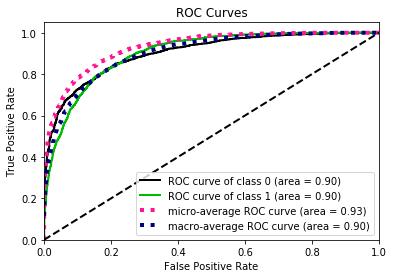

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import scikitplot as skplt

y_pred = clf.best_estimator_.predict(X_test)
print('Accuracy mcore: ',accuracy_score(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred))
skplt.metrics.plot_roc(y_test, clf.best_estimator_.predict_proba(X_test))
plt.show()